In [9]:
import numpy as np
# np.random.seed(1018)
import matplotlib.pyplot as plt
import random as rm
import pandas as pd
from sklearn import preprocessing
from keras.layers import TimeDistributed,Dense,GRU,Dropout,LSTM,Activation
from keras.utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam,RMSprop

TIME_STEPS = 32
BATCH_SIZE = 128
CELL_SIZE = 128

In [ ]:
# x = np.arange(40000)
# noise = np.random.uniform(0,0.1,x.shape)+np.random.normal(0,0.05,x.shape)
# y = np.sin(np.pi*x/50)+np.sin(np.pi*x/25)+np.cos(np.pi*x/50)+np.sin(np.pi*x/40+np.pi*3/4) +np.cos(np.pi*x/25+np.pi/4)+noise
# # y = noise+np.sin(np.pi*x/50)+noise
# dataset = y.reshape(-1,1)
# data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
# dataset = data_scaler.fit_transform(y.reshape(-1, 1))
# plt.figure(figsize=(20,10))
# plt.plot(dataset,"bo-",linewidth=0.5, markersize=5)
# plt.show()
# train = dataset[0:35000]
# test = dataset[35000:40000]
# plt.figure(figsize=(20,10))
# plt.plot(train)
# plt.show()
# plt.figure(figsize=(20,10))
# plt.plot(test)
# plt.show()

In [2]:
data = pd.read_csv('233.txt',sep=' ',header=None)[1][:]
data_scaler = preprocessing.MinMaxScaler(feature_range=(0.001,1))
dataset = data_scaler.fit_transform(data.reshape(-1, 1))

train = dataset[8100:-125]
normal_noise = np.random.normal(0,0.002,train.shape)
uniform_noise = np.random.uniform(-0.003,0.003,train.shape)
train_nn = train+normal_noise
train_un = train+uniform_noise
train = np.concatenate([train,train_nn,train_un])
train = np.concatenate([train,train])
# train = np.concatenate([train,train_nn])
plt.figure(figsize=(50,30))
plt.plot(train)
plt.show()

AttributeError: 'Series' object has no attribute 'reshape'

In [4]:
train.shape

(40650, 1)

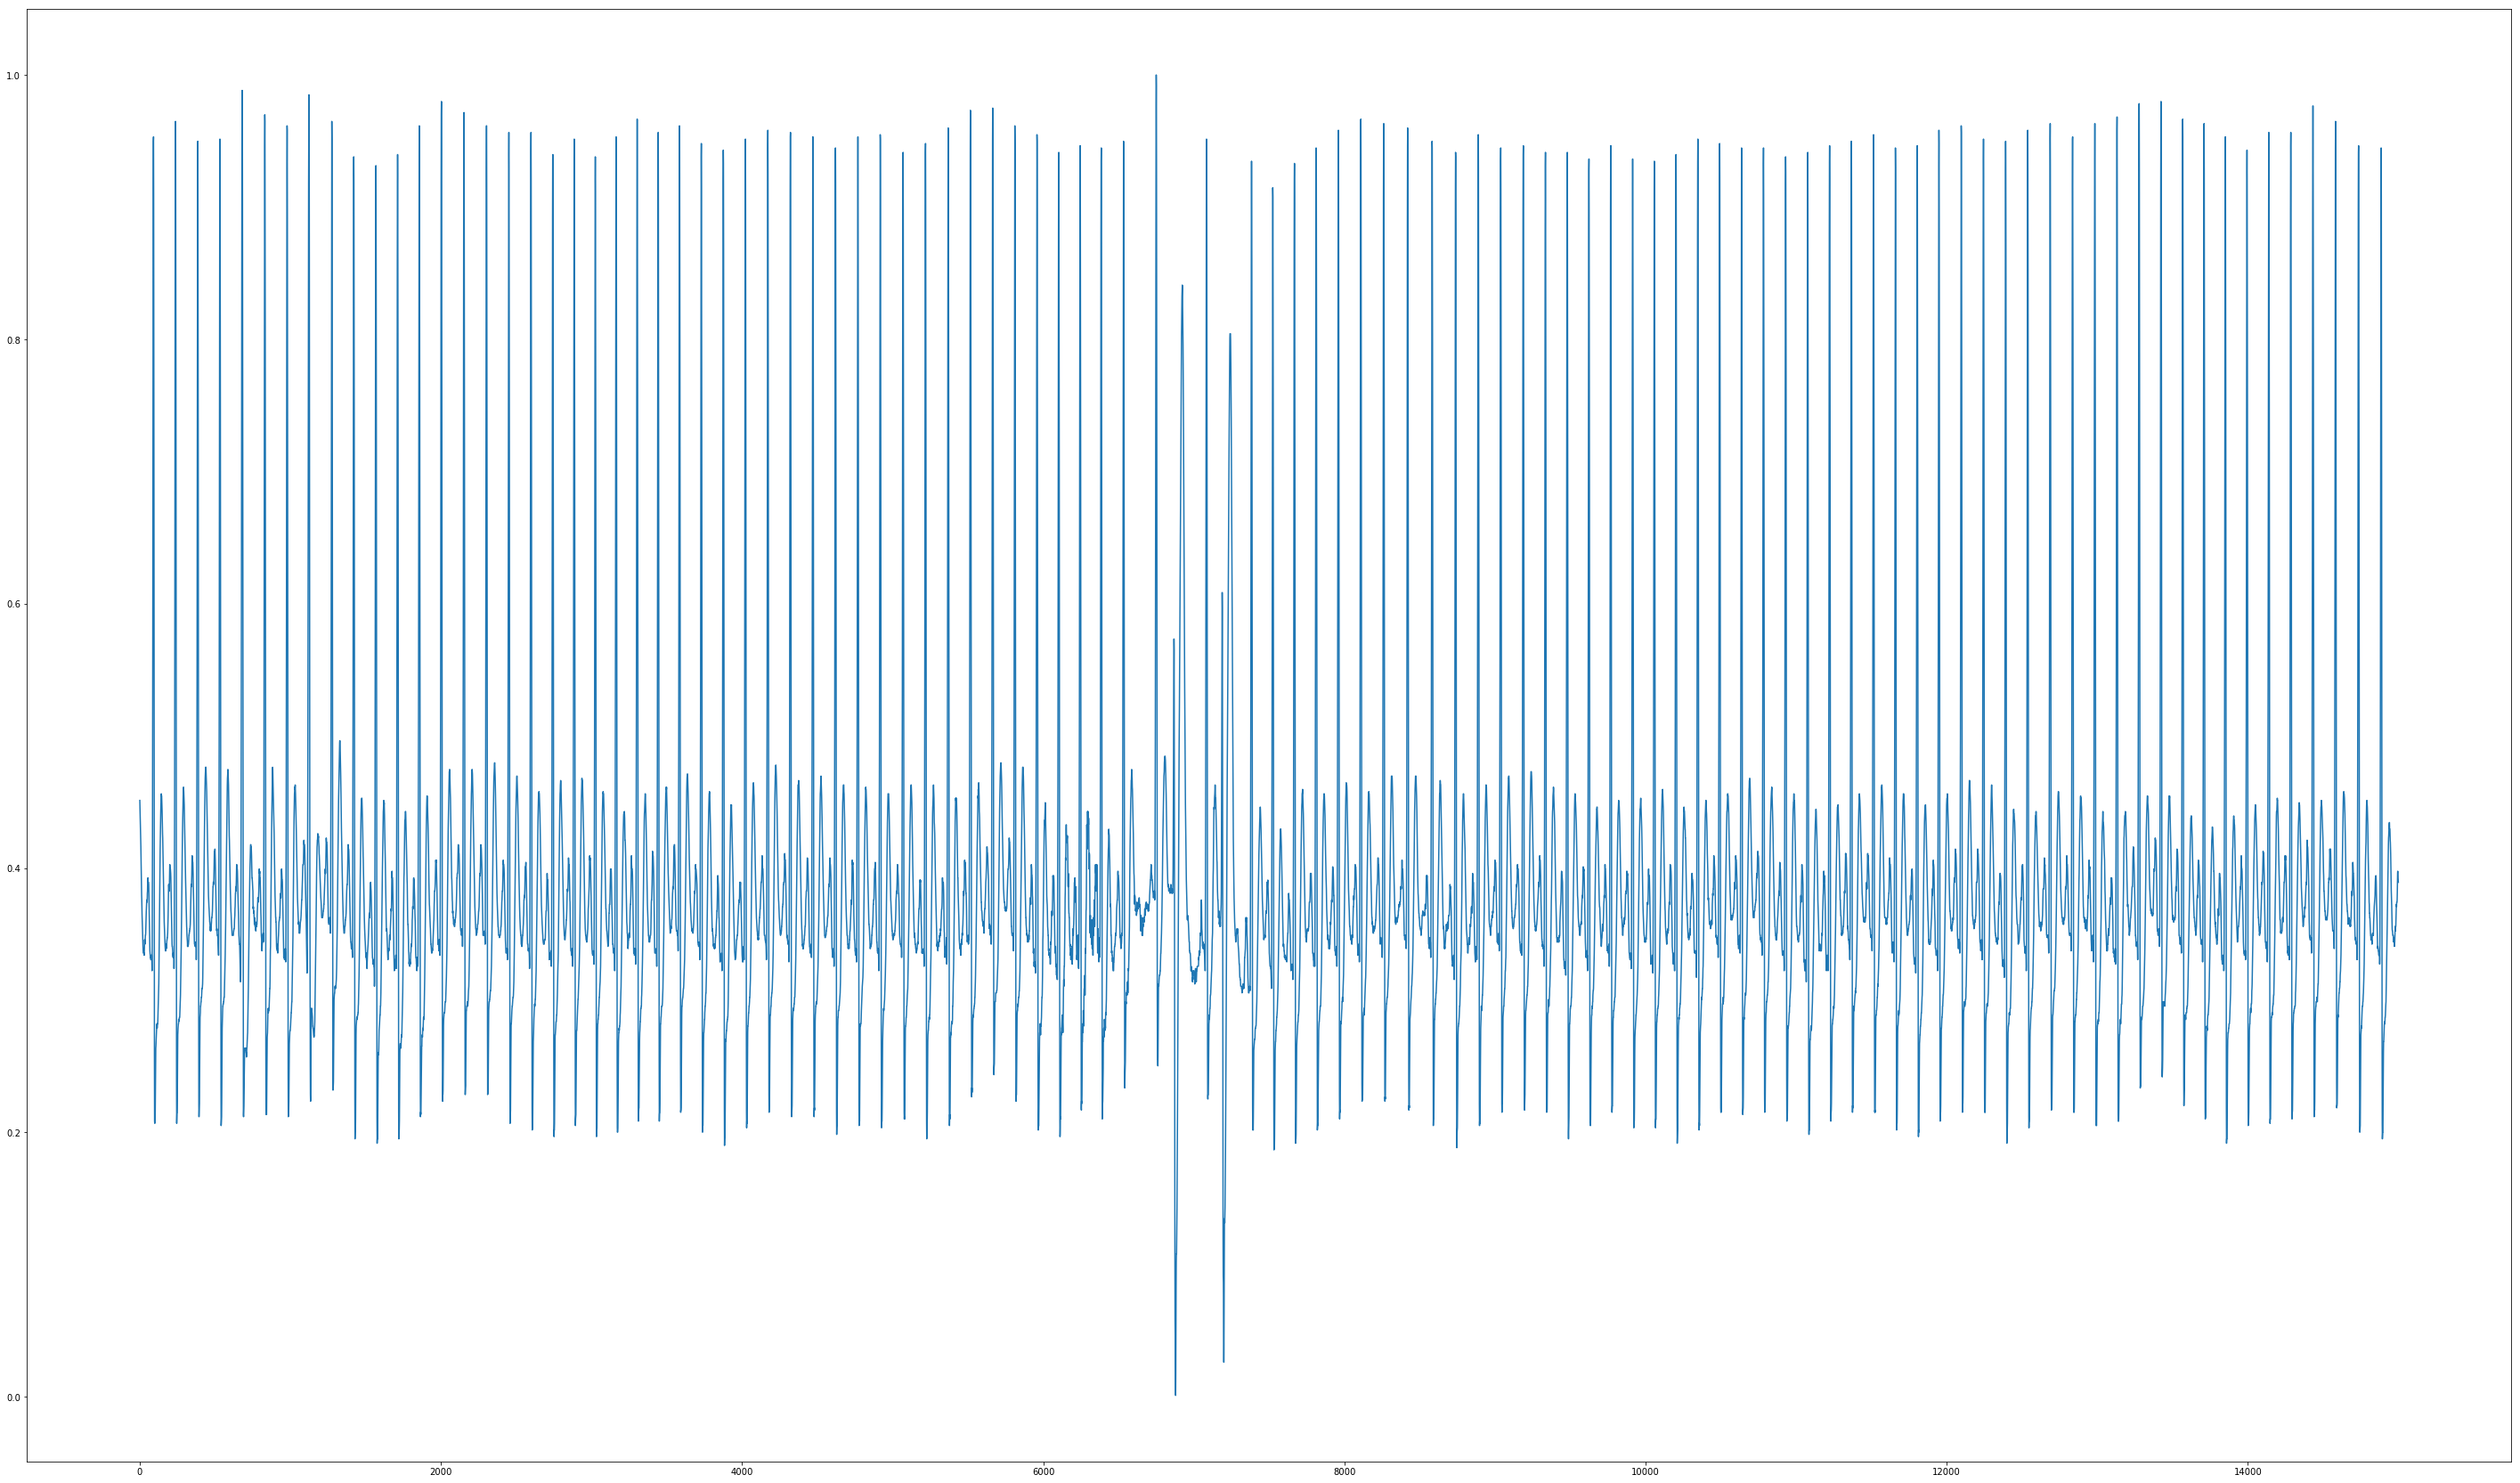

In [5]:
plt.figure(figsize=(50,30))
plt.plot(dataset)
plt.show()

In [6]:
# data_scaler = preprocessing.MinMaxScaler(feature_range=(0.001,1))
# dataset = data_scaler.fit_transform(train)
dataset = (train*1000).astype(np.int32)
print(dataset.shape)
enconder = preprocessing.OneHotEncoder()
enconder.fit(np.arange(1,1001).reshape(-1,1))
# enconder.fit(dataset)
dataset = enconder.transform(dataset).toarray()

(40650, 1)


In [7]:
dataset.shape

(40650, 1000)

In [8]:
train = dataset[0:40000]
# test = dataset[40000::]

In [9]:
train.shape

(40000, 1000)

In [7]:
def GetBatch(data,TIME_STEPS):
    data_X = []
    data_y = []
    for INDEX in range(0,len(data)-TIME_STEPS):
        X_step = data[INDEX:INDEX+TIME_STEPS,:]
        y_step = data [INDEX+TIME_STEPS,:]
        data_X.append(X_step)
        data_y.append(y_step)
    return np.array(data_X),np.array(data_y)

In [11]:
trainX,trainy = GetBatch(train,TIME_STEPS)
# testX,testy = GetBatch(test,TIME_STEPS)

In [29]:
test = dataset[40000::]
testX,testy = GetBatch(test,TIME_STEPS)

In [12]:
trainX.shape

(39968, 32, 1000)

In [12]:
trainX

array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       ..., 
       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0., 

In [13]:
trainX[2][TIME_STEPS-1] == trainy[1]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [14]:
False in (trainX[2][TIME_STEPS-1] == trainy[1])

False

In [15]:
trainy.shape[1]

1000

In [16]:
model = Sequential()
model.add(LSTM(CELL_SIZE, input_shape=(TIME_STEPS, trainy.shape[1])))
model.add(Dropout(0.2))
model.add(Dense(trainy.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [17]:
model.fit(trainX, trainy, batch_size=BATCH_SIZE,epochs=12)

Epoch 1/12
39968/39968 [==============================] - 54s 1ms/step - loss: 5.6884
Epoch 2/12
39968/39968 [==============================] - 49s 1ms/step - loss: 5.0555
Epoch 3/12
39968/39968 [==============================] - 42s 1ms/step - loss: 4.0626
Epoch 4/12
39968/39968 [==============================] - 45s 1ms/step - loss: 3.5819
Epoch 5/12
39968/39968 [==============================] - 48s 1ms/step - loss: 3.3414
Epoch 6/12
39968/39968 [==============================] - 38s 950us/step - loss: 3.1756
Epoch 7/12
39968/39968 [==============================] - 37s 926us/step - loss: 3.0474
Epoch 8/12
39968/39968 [==============================] - 41s 1ms/step - loss: 2.9407
Epoch 9/12
39968/39968 [==============================] - 44s 1ms/step - loss: 2.8441
Epoch 10/12
39968/39968 [==============================] - 44s 1ms/step - loss: 2.7661
Epoch 11/12
39968/39968 [==============================] - 43s 1ms/step - loss: 2.6808
Epoch 12/12
39968/39968 [=======================

In [18]:
model.save('233_concentrate.h5')

In [20]:
# from keras.models import load_model
# model = load_model('sin+noise_oe.h5')

In [14]:
def prediction(batch_size,time_step,X_test):
    X_test = X_test.reshape(-1,X_test.shape[0],X_test.shape[1])
    y_pred = model.predict(X_test, batch_size=batch_size)
    return y_pred

In [30]:
testX.shape

(618, 32, 1000)

In [31]:
predictions = []
for num in testX[0].squeeze():
    predictions.append(num.tolist())
# y_pred = testy[0]

In [32]:
for i in range(1,500):
    y_pred = prediction(BATCH_SIZE,TIME_STEPS,np.array(predictions[-TIME_STEPS::]))
    predictions.append(y_pred.squeeze().tolist())

In [33]:
len(predictions)

531

In [34]:
len(predictions[0])

1000

In [35]:
sequence = np.argmax(predictions, axis=1)/1000

In [36]:
sequence.shape

(531,)

In [37]:
# testy.shape

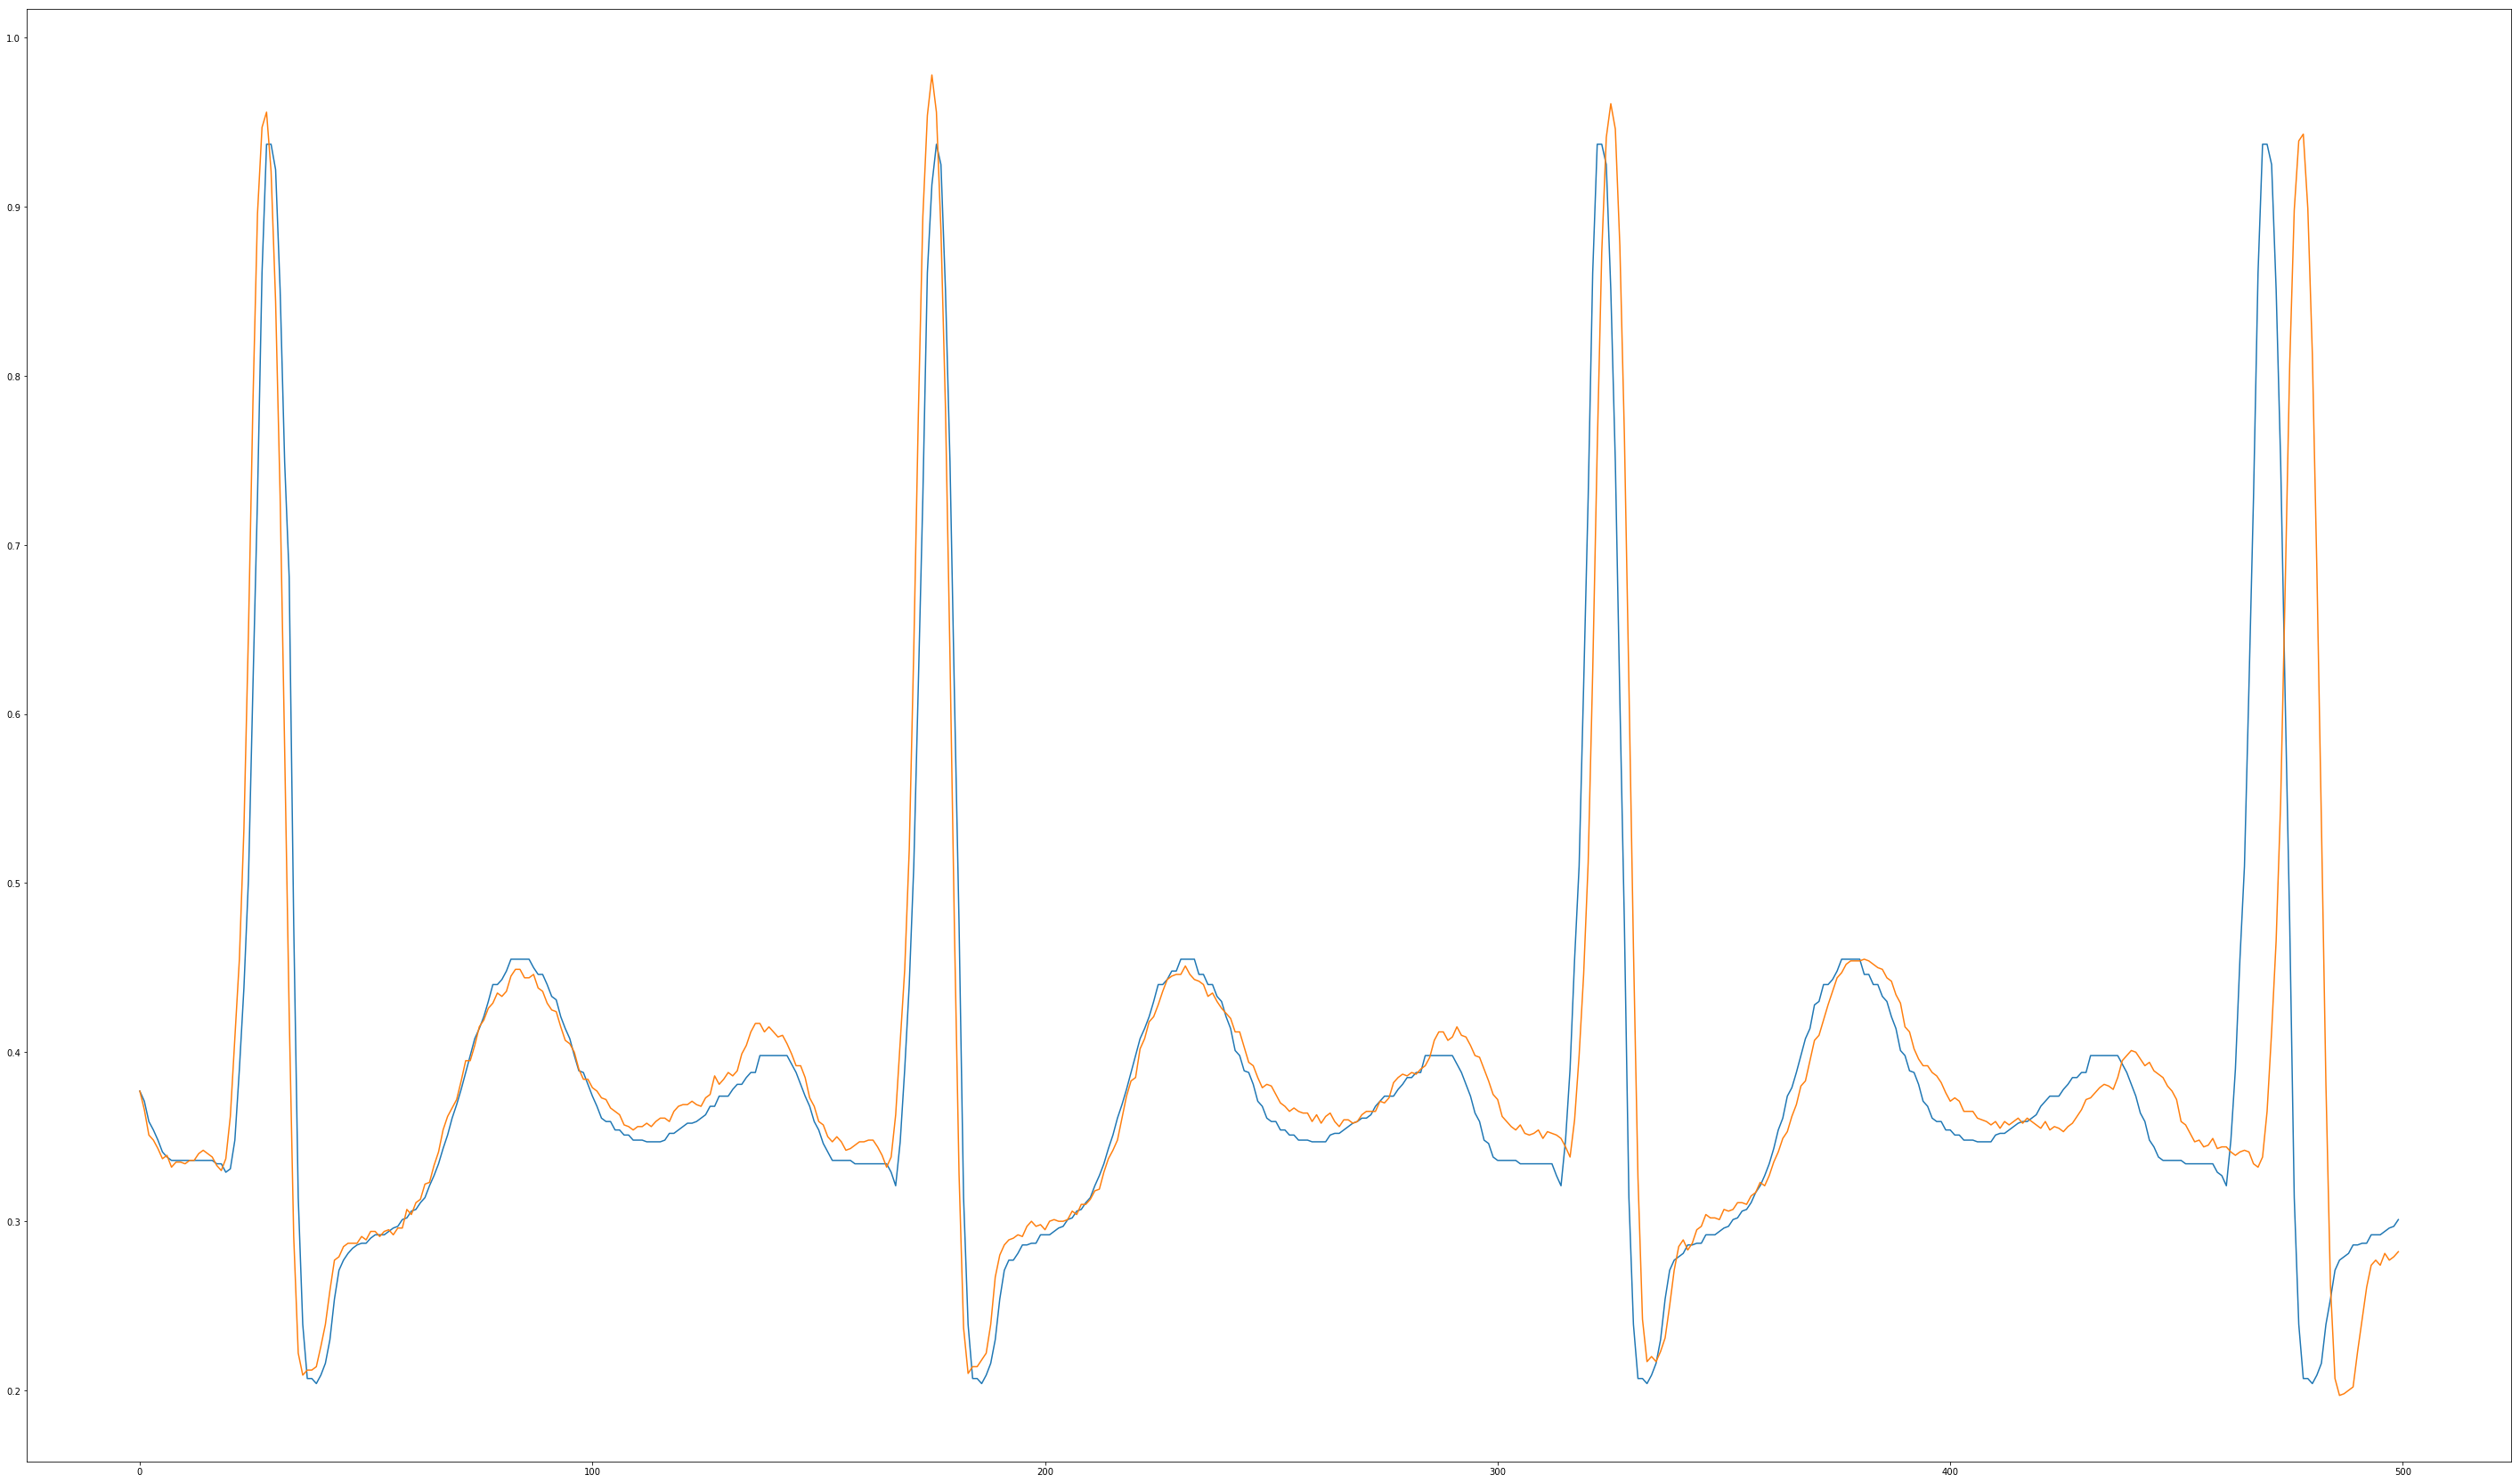

In [39]:
plt.figure(figsize=(50,30))
plt.plot(sequence[-500::])
plt.plot(np.argmax(testy[:500],axis=1)/1000)
plt.show()

In [40]:
re_list = []
for i in range(50):
    result = np.mean(np.argmax(predictions[-500::], axis=1)-np.argmax(testy[:500,:],axis=1) < i)
    re_list.append(result)

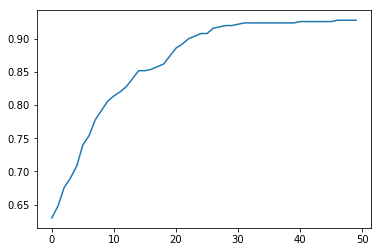

In [41]:
plt.plot(re_list)
plt.show()

In [30]:
print(re_list)

[0.42999999999999999, 0.47333333333333333, 0.505, 0.55166666666666664, 0.59499999999999997, 0.64333333333333331, 0.66833333333333333, 0.70499999999999996, 0.73999999999999999, 0.77666666666666662, 0.79500000000000004, 0.81499999999999995, 0.82666666666666666, 0.83833333333333337, 0.84833333333333338, 0.85666666666666669, 0.86499999999999999, 0.875, 0.875, 0.88, 0.88, 0.89166666666666672, 0.90000000000000002, 0.90000000000000002, 0.90833333333333333, 0.91000000000000003, 0.91500000000000004, 0.91833333333333333, 0.92166666666666663, 0.92666666666666664, 0.93333333333333335, 0.93500000000000005, 0.93500000000000005, 0.94166666666666665, 0.94166666666666665, 0.94333333333333336, 0.94499999999999995, 0.94666666666666666, 0.94833333333333336, 0.94999999999999996, 0.95333333333333337, 0.95499999999999996, 0.95499999999999996, 0.95666666666666667, 0.95833333333333337, 0.95833333333333337, 0.95833333333333337, 0.95833333333333337, 0.95833333333333337, 0.95999999999999996]


In [1]:
from keras.models import load_model
model = load_model('233_concentrate.h5')

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


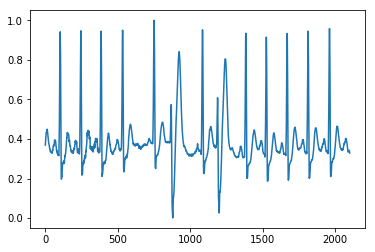

In [4]:
import numpy as np
# np.random.seed(1018)
import matplotlib.pyplot as plt
import random as rm
import pandas as pd
from sklearn import preprocessing
data = pd.read_csv('233.txt',sep=' ',header=None)
data_scaler = preprocessing.MinMaxScaler(feature_range=(0.001,1))
dataset = data_scaler.fit_transform(np.array(data[1][:]).reshape(-1, 1))
plt.plot(dataset[6000:8100])
plt.show()

In [5]:
dataset = (dataset[6000:8100]*1000).astype(np.int32)
enconder = preprocessing.OneHotEncoder()
enconder.fit(np.arange(1,1001).reshape(-1,1))
# enconder.fit(dataset)
dataset = enconder.transform(dataset).toarray()
# abnormaldata = enconder.transform(dataset[6000:7500]).toarray()

In [6]:
dataset.shape

(2100, 1000)

In [10]:
testX,testy = GetBatch(dataset,TIME_STEPS)

MemoryError: 

In [30]:
predictions = []
for num in testX[0].squeeze():
    predictions.append(num.tolist())

In [31]:
len(predictions)

32

In [32]:
for i in range(1,1500):
    y_pred = prediction(BATCH_SIZE,TIME_STEPS,np.array(predictions[-TIME_STEPS::]))
    predictions.append(y_pred.squeeze().tolist())

In [33]:
sequence = np.argmax(predictions, axis=1)/1000

In [34]:
sequence.shape

(1531,)

In [35]:
testy.shape

(1468, 1000)

In [44]:
len(sequence[31:-31])

1469

In [45]:
testy.shape

(1468, 1000)

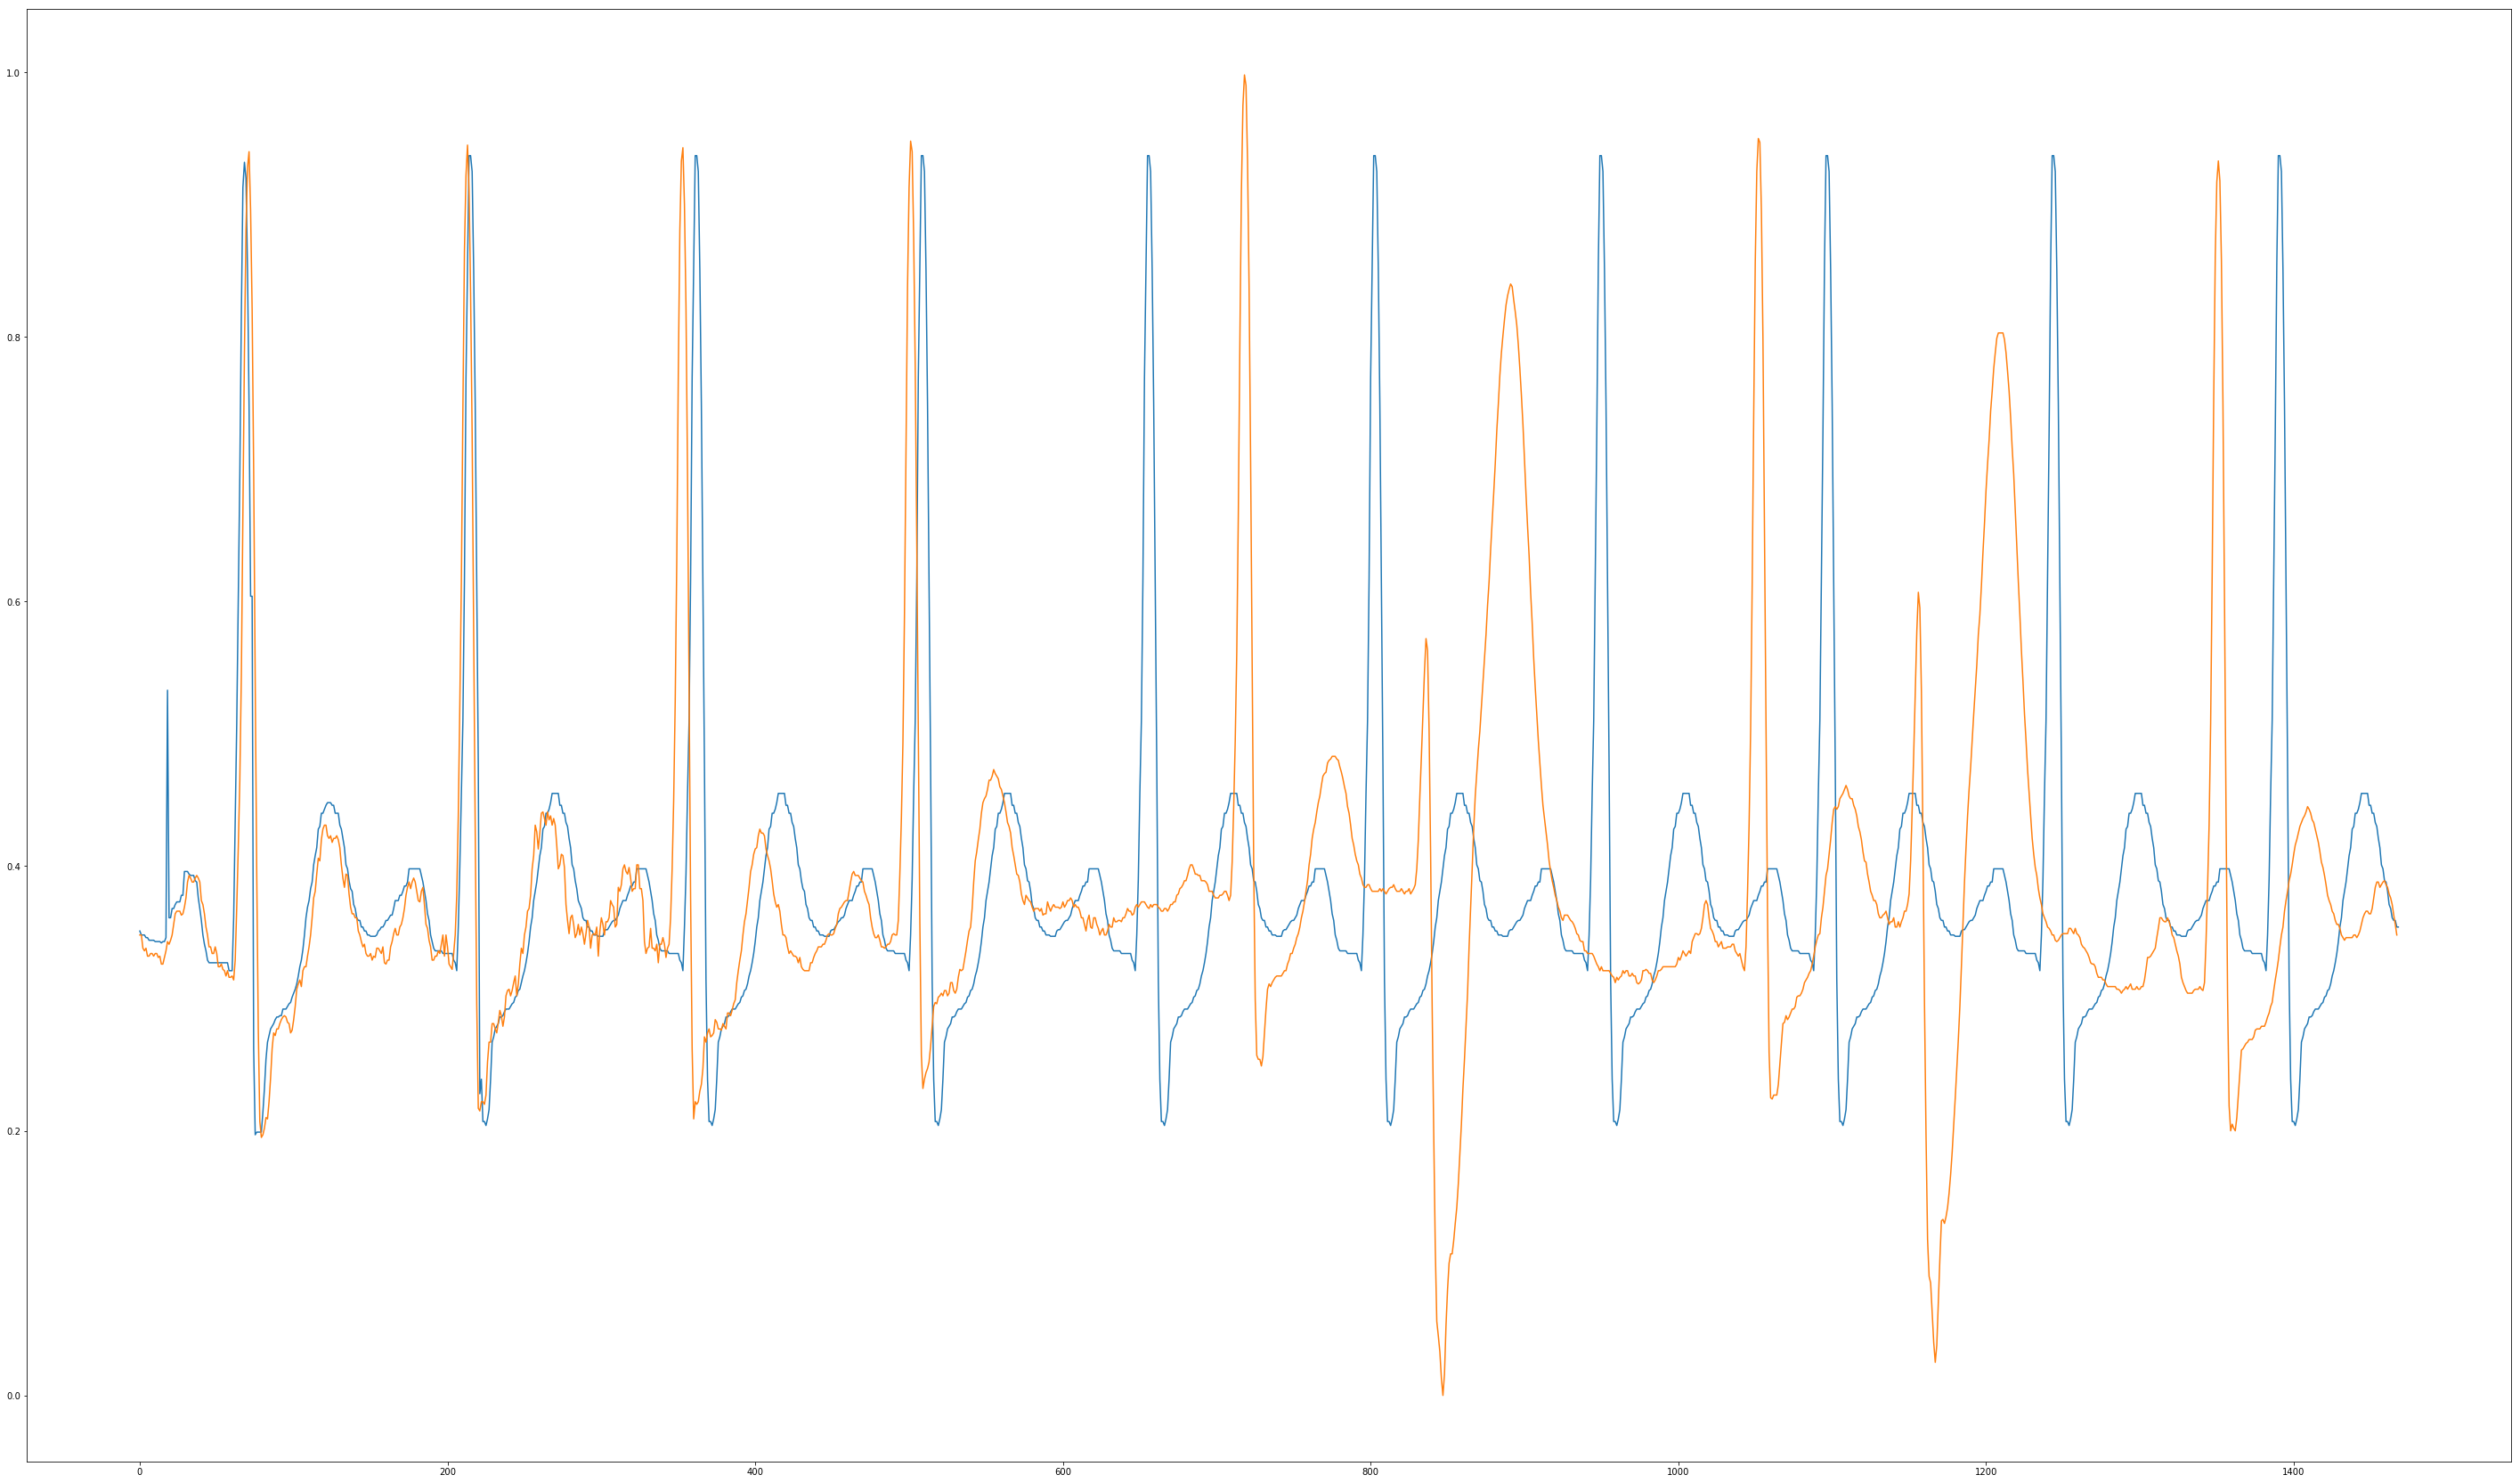

In [43]:
plt.figure(figsize=(50,30))
plt.plot(sequence[31:-31])
plt.plot(np.argmax(testy,axis=1)/1000)
plt.show()

In [20]:
len(predictions)

1531

In [21]:
list1 = predictions[-1468::]

In [22]:
for i in range(len(list1)):
    list1[i] = np.where(list1[i]==np.max(list1[i]),1,0)

In [23]:
len(list1)

1468

In [82]:
arr1 = np.array(list1)

In [83]:
np.sum(arr1,axis = 0)

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [85]:
np.sum(arr1,axis = 0).shape

(1000,)

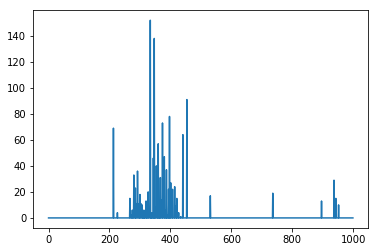

In [86]:
plt.plot(np.sum(arr1,axis = 0))
plt.show()

In [87]:
list2 = testy

In [88]:
for i in range(len(list2)):
    list2[i] = np.where(list2[i]==np.max(list2[i]),1,0)

In [89]:
len(list2)

1468

In [90]:
arr2 = np.array(list2)

In [93]:
np.sum(arr2,axis = 0)

array([  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   2.,   1.,   1.,   2.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   2.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         2.,   1.,   1.,   1.,   1.,   2.,   1.,   2.,   1.,   1.,   1.,
         1.,   2.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   2.,   1.,
         1.,   2.,   1.,   1.,   1.,   1.,   1.,   1.,   2.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   2.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   2.,   1.,   1.,   1.,   1.,   2.,   1.,   1.,
         1.,   1.,   2.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   2.,   1.,   1.,   2.,   1.,   1.,   1.,   3.,   1.,   1.,
         1.,   1.,   1.,   2.,   1.,   1.,   1.,   2.,   2.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   3.,   1.,
         2.,   2.,   1.,   2.,   1.,   1.,   1.,   1.,   1.,   1.,   3.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   

In [94]:
np.sum(arr2,axis = 0).shape

(1000,)

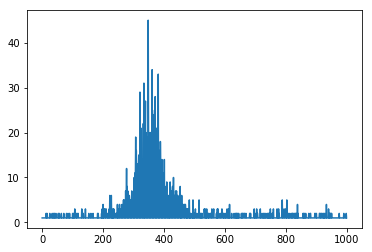

In [95]:
plt.plot(np.sum(arr2,axis = 0))
plt.show()

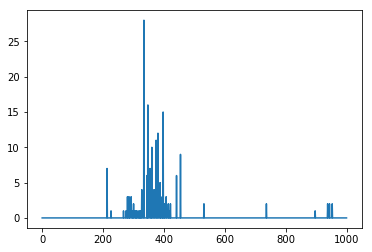

In [99]:
list1 = predictions[-1468:-1268]
for i in range(len(list1)):
    list1[i] = np.where(list1[i]==np.max(list1[i]),1,0)
arr1 = np.array(list1)
plt.plot(np.sum(arr1,axis = 0))
plt.show()

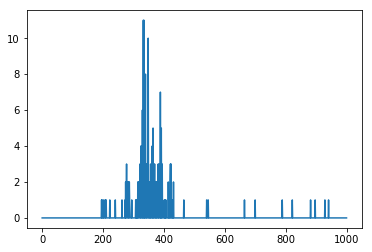

In [100]:
list2 = testy[0:200]
for i in range(len(list2)):
    list2[i] = np.where(list2[i]==np.max(list2[i]),1,0)
arr2 = np.array(list2)
plt.plot(np.sum(arr2,axis = 0))
plt.show()

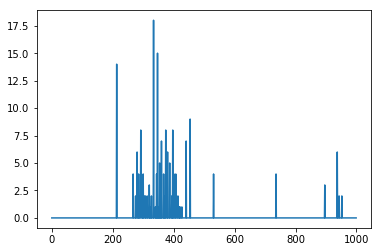

In [101]:
list1 = predictions[-1268:-1068]
for i in range(len(list1)):
    list1[i] = np.where(list1[i]==np.max(list1[i]),1,0)
arr1 = np.array(list1)
plt.plot(np.sum(arr1,axis = 0))
plt.show()

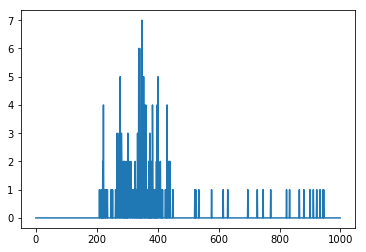

In [102]:
list2 = testy[200:400]
for i in range(len(list2)):
    list2[i] = np.where(list2[i]==np.max(list2[i]),1,0)
arr2 = np.array(list2)
plt.plot(np.sum(arr2,axis = 0))
plt.show()

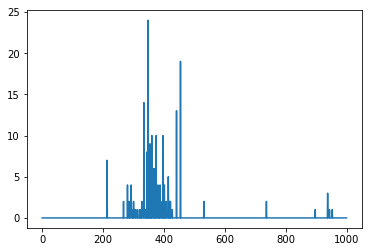

In [103]:
list1 = predictions[-1068:-868]
for i in range(len(list1)):
    list1[i] = np.where(list1[i]==np.max(list1[i]),1,0)
arr1 = np.array(list1)
plt.plot(np.sum(arr1,axis = 0))
plt.show()

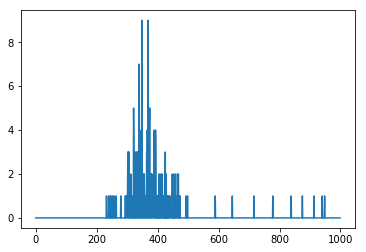

In [104]:
list2 = testy[400:600]
for i in range(len(list2)):
    list2[i] = np.where(list2[i]==np.max(list2[i]),1,0)
arr2 = np.array(list2)
plt.plot(np.sum(arr2,axis = 0))
plt.show()

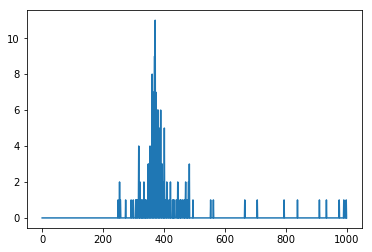

In [105]:
list2 = testy[600:800]
for i in range(len(list2)):
    list2[i] = np.where(list2[i]==np.max(list2[i]),1,0)
arr2 = np.array(list2)
plt.plot(np.sum(arr2,axis = 0))
plt.show()

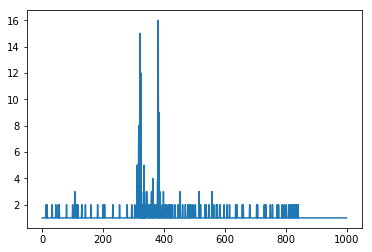

In [106]:
list2 = testy[800:1000]
for i in range(len(list2)):
    list2[i] = np.where(list2[i]==np.max(list2[i]),1,0)
arr2 = np.array(list2)
plt.plot(np.sum(arr2,axis = 0))
plt.show()

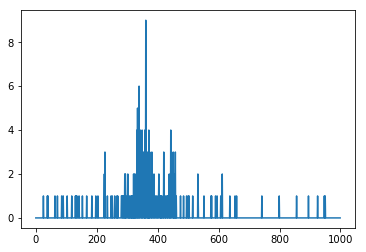

In [107]:
list2 = testy[1000:1200]
for i in range(len(list2)):
    list2[i] = np.where(list2[i]==np.max(list2[i]),1,0)
arr2 = np.array(list2)
plt.plot(np.sum(arr2,axis = 0))
plt.show()

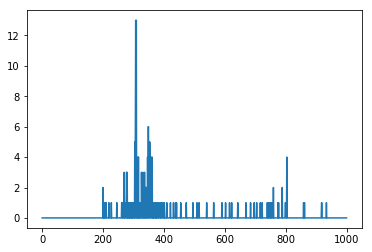

In [108]:
list2 = testy[1200:1400]
for i in range(len(list2)):
    list2[i] = np.where(list2[i]==np.max(list2[i]),1,0)
arr2 = np.array(list2)
plt.plot(np.sum(arr2,axis = 0))
plt.show()

In [ ]:
def DTW(xs,ys):
    ys_reverse = ys[-1::-1]
    d = np.zeros([len(ys),len(xs)])
    for i in range(len(xs)):
        d[:,i] = (xs[i] -ys_reverse)**2
    g = np.zeros([len(ys_reverse),len(xs)])
    g[-1,0] = 2*d[0,0]
    for i in range(1,g.shape[1]):
        g[-1,i] = g[-1,i-1]+d[-1,i]
    for i in range(0,g.shape[0]-1)[-1::-1]:
        g[i,0] = g[i+1,0]+d[i,0]
    for j in range(1,g.shape[1]):
        for i in range(0,g.shape[0]-1)[-1::-1]:
            g[i,j] = min(g[i+1,j]+d[i,j],g[i,j-1]+d[i,j],g[i+1,j-1]+2*d[i,j])
    return g[0,-1]